In [ ]:
from utils import openai_schema
from ome_types import OME
ignore = ["required", "default", 'title', 'name', 'namespace', "type", "description", "items", "enum", "anyOf", "allOf"]
openai_schema(OME, ignore)

In [ ]:
OME.model_json_schema()

In [6]:
sns.palettes._ColorPalette(sns.color_palette("Paired")[0::2])

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (1.0, 1.0, 0.6)]

In [7]:
import seaborn as sns

type(sns.color_palette("Paired"))

sns.palettes._ColorPalette(sns.color_palette("Paired")[1::2])

[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (1.0, 0.4980392156862745, 0.0),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

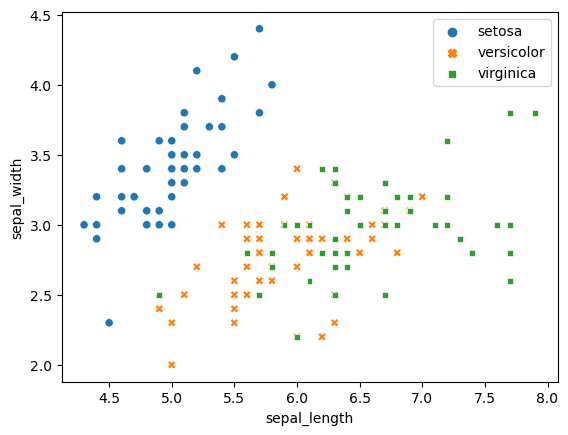

In [8]:
data = sns.load_dataset("iris")

ax = sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", style="species", data=data)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [4]:
p = ["q", "d"]
p.append("a")
p

['q', 'd', 'a']

In [5]:
test = {}
test["test"] = {}
test["test"]["test"] = {}



In [1]:
def generate_paths(json_data, current_path="", paths=None):
    if paths is None:
        paths = []

    if isinstance(json_data, dict):
        for key, value in json_data.items():
            new_path = f"{current_path}/{key}" if current_path else key
            
            if isinstance(value, (dict, list)):
                generate_paths(value, new_path, paths)
            else:
                paths.append(f"{new_path} = {value}")

    elif isinstance(json_data, list):
        for index, item in enumerate(json_data):
            if isinstance(item, dict) and 'id' in item:
                new_path = f"{current_path}{item['id'].split(':')[1]}"
                generate_paths(item, new_path, paths)
            else:
                new_path = f"{current_path}/{index}"
                generate_paths(item, new_path, paths)

    return paths

# Example usage
example_json = {
    "test": 5,
    "images": [
        {"image": {"id": "image:0"}},
        {"image": {"id": "image:1"}}
    ],
    "nested": {
        "key": "value",
        "list": [1, 2, 3]
    }
}

result = generate_paths(example_json)
for path in result:
    print(path)

test = 5
images/0/image/id = image:0
images/1/image/id = image:1
nested/key = value


In [2]:
def generate_paths(json_data, current_path="", paths=None):
    if paths is None:
        paths = []

    if isinstance(json_data, dict):
        for key, value in json_data.items():
            new_path = f"{current_path}/{key}" if current_path else key
            
            if isinstance(value, (dict, list)):
                generate_paths(value, new_path, paths)
            else:
                paths.append(f"{new_path} = {value}")

    elif isinstance(json_data, list):
        for index, item in enumerate(json_data):
            if isinstance(item, dict) and 'id' in item:
                new_path = f"{current_path}/{item['id'].split(':')[1]}"
                generate_paths(item, new_path, paths)
            else:
                new_path = f"{current_path}/{index}"
                if isinstance(item, (dict, list)):
                    generate_paths(item, new_path, paths)
                else:
                    paths.append(f"{new_path} = {item}")

    return paths

# Example usage
example_json = {
    "test": 5,
    "images": [
        {"image": {"id": "image:0"}},
        {"image": {"id": "image:1"}}
    ],
    "nested": {
        "key": "value",
        "list": [1, 2, 3]
    }
}

result = generate_paths(example_json)
for path in result:
    print(path)

test = 5
images/0/image/id = image:0
images/1/image/id = image:1
nested/key = value
nested/list/0 = 1
nested/list/1 = 2
nested/list/2 = 3


In [18]:
from ome_types import OME
from ome_types._autogenerated.ome_2016_06 import StructuredAnnotations, XMLAnnotation

xml_annot = XMLAnnotation(value="test")
struct_annot = StructuredAnnotations(xml_annotations=[xml_annot])
ome = OME(structured_annotations=struct_annot)


In [19]:
ome

OME(structured_annotations={'xml_annotations': [{'id': 'Annotation:13', 'value': {'any_elements': ['test']}, 'kind': 'xmlannotation'}]})

In [20]:
ome.structured_annotations = StructuredAnnotations()

In [27]:
d = ("a", "b")

a, b = d

print(a, b)

a b


In [2]:
from metagpt import utils



In [27]:
OME().imag

OME()

In [52]:
import json
import jsonpatch
from ome_types import  to_dict
from ome_types.model import OME
from typing import Any, Dict, Union

def ensure_path_exists(data: Dict[str, Any], path: str) -> None:
    """
    Ensure that the path exists in the data structure, creating empty lists or dicts as needed.
    """
    parts = path.strip("/").split("/")
    current = data
    for i, part in enumerate(parts):
        if part == "-" or part.isdigit():
            if not isinstance(current, list):
                current = []
            if part == "-" or int(part) == len(current):
                current.append({})
            elif int(part) > len(current):
                current.extend([{} for _ in range(int(part) - len(current) + 1)])
            current = current[int(part) if part != "-" else -1]
        else:
            if part not in current:
                if i < len(parts) - 1 and (parts[i+1] == "-" or parts[i+1].isdigit()):
                    current[part] = []
                else:
                    current[part] = {}
            current = current[part]

def custom_apply(patch: jsonpatch.JsonPatch, data: Dict[str, Any]) -> Dict[str, Any]:
    """
    Apply the JSON Patch, automatically creating missing nodes.
    """
    for operation in patch:
        if operation["op"] in ["add", "replace"]:
            ensure_path_exists(data, "/".join(operation["path"].split("/")[:-1]))
        elif operation["op"] == "remove":
            ensure_path_exists(data, operation["path"])
    return patch.apply(data)

def update_state(current_state: OME, proposed_change: list) -> OME:
    """
    Update the OME state based on proposed changes using JSONPatch, automatically creating missing nodes.

    Args:
        current_state (OME): The current OME state.
        proposed_change (list): The change proposed as a JSON Patch document.

    Returns:
        OME: The updated OME state.

    Raises:
        jsonpatch.JsonPatchException: If the patch is invalid or cannot be applied.
        ValueError: If the resulting document is not a valid OME model.
    """
    # Convert current state to a dictionary, ensuring all default empty lists are included
    current_dict = json.loads(current_state.model_dump_json())

    try:
        # Apply the JSON Patch with custom logic to create missing nodes
        patch = jsonpatch.JsonPatch(proposed_change)
        updated_dict = custom_apply(patch, current_dict)

        # Convert the updated dictionary back to an OME object
        updated_state = from_dict(updated_dict)

        return updated_state

    except jsonpatch.JsonPatchException as e:
        raise ValueError(f"Invalid JSON Patch: {str(e)}")
    except Exception as e:
        raise ValueError(f"Error applying patch or converting to OME: {str(e)}")

# Example usage
if __name__ == "__main__":
    # Create an empty OME object
    initial_state = OME()

    # Define a JSON Patch to add a new image with a channel
patch1 = [
        {
            "op": "add",
            "path": "/images/0/pixels",
            "value": {
                    "id": "Pixels:0",
                    "type": "uint16",
                    "dimension_order": "XYZCT",
                    "size_x": 1024,
                    "size_y": 1024,
                    "size_z": 1,
                    "size_c": 3,
                    "size_t": 1,
                    "channels": [
                        {
                            "id": "Channel:0",
                            "name": "Red",
                            "color": -16776961
                        }
                    ]

            }
        }
    ]

try:
    updated_state = update_state(initial_state, patch1)
    print("Updated OME object:")
    print(to_dict(updated_state))
except ValueError as e:
    print(f"Error: {str(e)}")

Updated OME object:
{'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red', 'color': Color('red', rgb=(255, 0, 0))}], 'id': 'Pixels:0', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT16: 'uint16'>, 'size_x': 1024, 'size_y': 1024, 'size_z': 1, 'size_c': 3, 'size_t': 1}, 'id': 'Image:4'}]}


In [57]:
patch = [{'op': 'add',
         'path': '/images/-',
         'value': {
             'id': 'Image:0',
             'name': 'testetst_Image8_edited_.ome.tif',
             'pixels': {'id': 'Pixels:0',
                        'dimension_order': 'XYCZT',
                        'size_x': 680,
                        'size_y': 280,
                        'size_z': 1,
                        'size_c': 3,
                        'size_t': 30,
                        'type': 'uint8',
                        'physical_size_x': 0.09922878199885109,
                        'physical_size_x_unit': 'µm', 
                        'physical_size_y': 0.09922878199885109,
                        'physical_size_y_unit': 'µm',
                        'channels': [{'id': 'Channel:0:0', 'samples_per_pixel': 1},
                                     {'id': 'Channel:0:1', 'samples_per_pixel': 1},
                                     {'id': 'Channel:0:2', 'samples_per_pixel': 1}
                                     ]
                                     }
                                     }
                                     }]

In [58]:
update_state(OME(), patch)

OME(images=[<1 field_type>])

In [54]:
pixels_patch_data = [
  {
    "op": "add",
    "path": "/images/-",
    "value": {
      "id": "Image:0",
      "name": "New Image",
      "acquisition_date": "2024-07-21T12:00:00",
      "pixels": {
        "id": "Pixels:0",
        "type": "uint16",
        "dimension_order": "XYZCT",
        "size_x": 1024,
        "size_y": 1024,
        "size_z": 1,
        "size_c": 3,
        "size_t": 1,
        "physical_size_x": 0.1,
        "physical_size_x_unit": "µm",
        "physical_size_y": 0.1,
        "physical_size_y_unit": "µm",
        "physical_size_z": 1.0,
        "physical_size_z_unit": "µm",
        "channels": [
          {
            "id": "Channel:0",
            "name": "Red",
            "color": -16776961
          },
          {
            "id": "Channel:1",
            "name": "Green",
            "color": 16711935
          },
          {
            "id": "Channel:2",
            "name": "Blue",
            "color": 65535
          }
        ]
      }
    }
  }
]


ValueError: Invalid JSON Patch: Document is expected to be sequence of operations, got a sequence of strings.

In [39]:
test = OME()
to_dict(test) # returns {}
test.model_dump_json() # returns '{"rights":null,"projects":[],"datasets":[],"folders":[],"experiments":[],"plates":[],"screens":[],"experimenters":[],"experimenter_groups":[],"instruments":[],"images":[],"structured_annotations":{"xml_annotations":[],"file_annotations":[],"list_annotations":[],"long_annotations":[],"double_annotations":[],"comment_annotations":[],"boolean_annotations":[],"timestamp_annotations":[],"tag_annotations":[],"term_annotations":[],"map_annotations":[]},"rois":[],"binary_only":null,"uuid":null,"creator":null}'


{}

In [38]:
test = OME()
test.model_dump_json()


'{"rights":null,"projects":[],"datasets":[],"folders":[],"experiments":[],"plates":[],"screens":[],"experimenters":[],"experimenter_groups":[],"instruments":[],"images":[],"structured_annotations":{"xml_annotations":[],"file_annotations":[],"list_annotations":[],"long_annotations":[],"double_annotations":[],"comment_annotations":[],"boolean_annotations":[],"timestamp_annotations":[],"tag_annotations":[],"term_annotations":[],"map_annotations":[]},"rois":[],"binary_only":null,"uuid":null,"creator":null}'

In [40]:
import json
import jsonpatch
from ome_types import to_dict
from metagpt.utils.utils import from_dict
from ome_types.model import OME

def update_state(current_state: OME, proposed_change: dict) -> OME:
    """
    Update the OME state based on proposed changes using JSONPatch.

    Args:
        current_state (OME): The current OME state.
        proposed_change (dict): The change proposed as a JSON Patch document.

    Returns:
        OME: The updated OME state.

    Raises:
        jsonpatch.JsonPatchException: If the patch is invalid or cannot be applied.
        ValueError: If the resulting document is not a valid OME model.
    """
    # Convert current state to a dictionary
    current_dict = json.loads(current_state.model_dump_json())

    try:
        # Apply the JSON Patch
        patch = jsonpatch.JsonPatch(proposed_change)
        updated_dict = patch.apply(current_dict)

        # Convert the updated dictionary back to an OME object
        updated_state = from_dict(updated_dict)

        return updated_state

    except jsonpatch.JsonPatchException as e:
        raise ValueError(f"Invalid JSON Patch: {str(e)}")
    except Exception as e:
        raise ValueError(f"Error applying patch or converting to OME: {str(e)}")
    return updated_state

In [10]:
def test()-> jsonpatch.JsonPatch:
    return jsonpatch.JsonPatch([
        {"op": "add", "path": "/structured_annotations/xml_annotations/-", "value": {"value": "test"}}
    ])

In [ ]:
Image

In [ ]:
from json_patch_model import JsonPatch

pixels_patch_data = [
  {
    "op": "add",
    "path": "/images/0/pixels",
    "value": {
      "id": "Pixels:0",
      "type": "uint16",
      "dimension_order": "XYZCT",
      "size_x": 1024,
      "size_y": 1024,
      "size_z": 1,
      "size_c": 3,
      "size_t": 1,
      "physical_size_x": 0.1,
      "physical_size_x_unit": "µm",
      "physical_size_y": 0.1,
      "physical_size_y_unit": "µm",
      "physical_size_z": 1.0,
      "physical_size_z_unit": "µm",
      "channels": [
        {
          "id": "Channel:0",
          "name": "Red",
          "color": -16776961
        },
        {
          "id": "Channel:1",
          "name": "Green",
          "color": 16711935
        },
        {
          "id": "Channel:2",
          "name": "Blue",
          "color": 65535
        }
      ]
    }
  }
]

try:
    json_patch = JsonPatch(root=pixels_patch_data)
    print("Valid JSON Patch for adding Pixels property")
    print(json_patch.model_dump_json(indent=2))
except ValueError as e:
    print(f"Invalid JSON Patch: {e}")

In [4]:
import json
from ome_types import to_dict
from ome_types.model import OME
from ome_types._autogenerated.ome_2016_06 import Image, Pixels
from metagpt.utils.utils import from_dict


# Import the update_state function from your module
#from your_module import update_state

def print_state(state: OME):
    print(to_dict(state))

# Create an initial OME state
pixel = Pixels(size_x=1024,
               size_y=768,
               dimension_order="XYZCT",
               size_t=1,
               size_c=1,
               size_z=1, 
               type="uint8",
               channels=[{"id": "Channel:0", "name": "Red"},
                         {"id": "Channel:1", "name": "Red2"},
                         {"id": "Channel:3", "name": "Red3"}])

image = Image(name="Test Image", pixels=pixel)
initial_state = OME(images=[image])

print("Initial State:")
print(to_dict(initial_state))

# Test 1: Replace operation
patch1 = [
    {"op": "replace", "path": "/images/0/name", "value": "Updated Image Name"}
]
updated_state1 = update_state(initial_state, patch1)
print("\nAfter Replace Operation:")
print(to_dict(updated_state1))

# Test 2: Add operation
patch2 = [
    {"op": "add", "path": "/images/0/description", "value": "A new description"}
]
updated_state2 = update_state(updated_state1, patch2)
print("\nAfter Add Operation:")
print_state(updated_state2)

# Test 3: Remove operation
patch3 = [
    {"op": "remove", "path": "/images/0/pixels/channels/2"}
]
updated_state3 = update_state(updated_state2, patch3)
print("\nAfter Remove Operation:")
print_state(updated_state3)

# Test 4: Multiple operations in one patch
patch4 = [
    {"op": "replace", "path": "/images/0/pixels/size_x", "value": 2048},
    {"op": "replace", "path": "/images/0/pixels/size_y", "value": 1536},
    {"op": "add", "path": "/images/0/pixels/channels/-", "value": {"id": "Channel:3", "name": "Alpha"}}
]
updated_state4 = update_state(updated_state3, patch4)
print("\nAfter Multiple Operations:")
print_state(updated_state4)

# Test 5: Move operation
patch5 = [
    {"op": "move", "from": "/images/0/pixels/channels/0", "path": "/images/0/pixels/channels/-"}
]
updated_state5 = update_state(updated_state4, patch5)
print("\nAfter Move Operation:")
print_state(updated_state5)

# Test 6: Copy operation
patch6 = [
    {"op": "copy", "from": "/images/0/pixels/channels/0", "path": "/images/0/pixels/channels/-"}
]
updated_state6 = update_state(updated_state5, patch6)
print("\nAfter Copy Operation:")
print_state(updated_state6)

# Test 7: Test operation (this doesn't modify the state, but verifies a condition)
patch7 = [
    {"op": "test", "path": "/images/0/name", "value": "Updated Image Name"}
]
try:
    update_state(updated_state6, patch7)
    print("\nTest Operation Passed")
except ValueError as e:
    print(f"\nTest Operation Failed: {str(e)}")

Initial State:
{'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red'}, {'id': 'Channel:1', 'name': 'Red2'}, {'id': 'Channel:3', 'name': 'Red3'}], 'id': 'Pixels:2', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT8: 'uint8'>, 'size_x': 1024, 'size_y': 768, 'size_z': 1, 'size_c': 1, 'size_t': 1}, 'id': 'Image:2', 'name': 'Test Image'}]}

After Replace Operation:
{'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red'}, {'id': 'Channel:1', 'name': 'Red2'}, {'id': 'Channel:3', 'name': 'Red3'}], 'id': 'Pixels:2', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT8: 'uint8'>, 'size_x': 1024, 'size_y': 768, 'size_z': 1, 'size_c': 1, 'size_t': 1}, 'id': 'Image:2', 'name': 'Updated Image Name'}]}

After Add Operation:
{'images': [{'description': 'A new description', 'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red'}, {'id': 'Channel:1', 'name': 'Red2'}, {'id': 'Channel:3', 'name': 'Red3'}],

In [4]:
from ome_types import OME

test = OME()
test_model = test.model_dump_json()

In [76]:
from pygram import tree

def json_to_pygram(json_data: dict):
    """
    Convert a JSON structure to a pygram tree.
    """
    def convert_element(key, value):
        node = tree.Node(key)
        
        if isinstance(value, dict):
            for k, v in value.items():
                node.addkid(convert_element(k, v))
        elif isinstance(value, list):
            for i, item in enumerate(value):
                node.addkid(convert_element(f"{key}_{i}", item))
        else:
            node.addkid(tree.Node(str(value)))
        
        return node

    # Assuming the input is a dictionary with a single root element
    root_key, root_value = next(iter(json_data.items()))
    return convert_element(root_key, root_value)

In [71]:
from pygram import tree

def json_to_pygram(element: dict):
    """
    Convert a JSON element to a pygram tree.
    """
    # Use the first key of the dictionary as the node label
    element_key = next(iter(element))

    node = tree.Node(element_key)
    
    # Get the value associated with the key
    print(element_key)
    element_value = element[element_key]
    print(type(element_value))

    # If the value is a list or dict, process its children
    if isinstance(element_value, (dict)):
        node.addkid(json_to_pygram(element_value))
    if isinstance(element_value, (list)):
        for child in element_value:
            if isinstance(child, dict):
                node.addkid(json_to_pygram(child))
            else:
                node.addkid(tree.Node(str(child)))
    else:
        node.addkid(tree.Node(str(element_value)))
    return node

In [57]:
for k, v in my_dict.items():
    print(k, v)

ome {'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red', 'color': Color('red', rgb=(255, 0, 0))}, {'id': 'Channel:1', 'name': 'Green', 'color': Color('lime', rgb=(0, 255, 0))}, {'id': 'Channel:2', 'name': 'Blue', 'color': Color('blue', rgb=(0, 0, 255))}], 'id': 'Pixels:0', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT16: 'uint16'>, 'size_x': 1024, 'size_y': 1024, 'size_z': 1, 'size_c': 3, 'size_t': 1, 'physical_size_x': 0.1, 'physical_size_y': 0.1, 'physical_size_z': 1.0}, 'id': 'Image:1'}]}


In [66]:
test = {'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red', 'color': Color('red', rgb=(255, 0, 0))}, {'id': 'Channel:1', 'name': 'Green', 'color': Color('lime', rgb=(0, 255, 0))}, {'id': 'Channel:2', 'name': 'Blue', 'color': Color('blue', rgb=(0, 0, 255))}], 'id': 'Pixels:0', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT16: 'uint16'>, 'size_x': 1024, 'size_y': 1024, 'size_z': 1, 'size_c': 3, 'size_t': 1, 'physical_size_x': 0.1, 'physical_size_y': 0.1, 'physical_size_z': 1.0}, 'id': 'Image:1'}]}
test

SyntaxError: invalid syntax (1565195110.py, line 1)

[<pygram.tree.Node at 0x74aed2cfbfa0>, <pygram.tree.Node at 0x74aed2cfbac0>]

In [77]:
my_pygran = json_to_pygram({"ome": to_dict(test)})

In [32]:
my_dict = {"ome": to_dict(test)} 

In [31]:

from ome_types import to_dict



{'ome': {'images': [{'pixels': {'channels': [{'id': 'Channel:0',
       'name': 'Red',
       'color': Color('red', rgb=(255, 0, 0))},
      {'id': 'Channel:1',
       'name': 'Green',
       'color': Color('lime', rgb=(0, 255, 0))},
      {'id': 'Channel:2',
       'name': 'Blue',
       'color': Color('blue', rgb=(0, 0, 255))}],
     'id': 'Pixels:0',
     'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>,
     'type': <PixelType.UINT16: 'uint16'>,
     'size_x': 1024,
     'size_y': 1024,
     'size_z': 1,
     'size_c': 3,
     'size_t': 1,
     'physical_size_x': 0.1,
     'physical_size_y': 0.1,
     'physical_size_z': 1.0},
    'id': 'Image:1'}]}}

In [27]:
from metagpt.utils.utils import update_state
test = OME()
test = update_state(test, pixels_patch_data)

In [24]:
from pydantic import BaseModel, Field, RootModel
from typing import List, Literal, Any, Union

class AddReplaceTestOperation(BaseModel):
    op: Literal["add", "replace", "test"]
    path: str = Field(..., description="A JSON Pointer path.")
    value: Any = Field(..., description="The value to add, replace or test.")

class RemoveOperation(BaseModel):
    op: Literal["remove"]
    path: str = Field(..., description="A JSON Pointer path.")

class MoveCopyOperation(BaseModel):
    op: Literal["move", "copy"]
    path: str = Field(..., description="A JSON Pointer path.")
    from_: str = Field(..., alias="from", description="A JSON Pointer path pointing to the location to move/copy from.")

class JsonPatch(BaseModel):
    root: List[Union[AddReplaceTestOperation, RemoveOperation, MoveCopyOperation]]

    class Config:
        title = "JSON schema for JSONPatch files"
        json_schema_extra = {
            "$schema": "http://json-schema.org/draft-04/schema#",
            "id": "https://json.schemastore.org/json-patch.json",
        }

# Example usage
patch_data = [
    {"op": "replace", "path": "/images/0/name", "value": "New Image Name"},
    {"op": "add", "path": "/images/0/description", "value": "A new description"},
    {"op": "remove", "path": "/images/0/pixels/channels/2"},
    {"op": "move", "from": "/images/0/pixels/channels/0", "path": "/images/0/pixels/channels/-"}
]

pixels_patch_data = [
  {
    "op": "add",
    "path": "/images/0/pixels",
    "value": {
      "id": "Pixels:0",
      "type": "uint16",
      "dimension_order": "XYZCT",
      "size_x": 1024,
      "size_y": 1024,
      "size_z": 1,
      "size_c": 3,
      "size_t": 1,
      "physical_size_x": 0.1,
      "physical_size_x_unit": "µm",
      "physical_size_y": 0.1,
      "physical_size_y_unit": "µm",
      "physical_size_z": 1.0,
      "physical_size_z_unit": "µm",
      "channels": [
        {
          "id": "Channel:0",
          "name": "Red",
          "color": -16776961
        },
        {
          "id": "Channel:1",
          "name": "Green",
          "color": 16711935
        },
        {
          "id": "Channel:2",
          "name": "Blue",
          "color": 65535
        }
      ]
    }
  }
]

try:
    json_patch = JsonPatch(root=pixels_patch_data)
    print("Valid JSON Patch")
    print(json_patch.model_dump_json(indent=2))
except ValueError as e:
    print(f"Invalid JSON Patch: {e}")

Valid JSON Patch
{
  "root": [
    {
      "op": "add",
      "path": "/images/0/pixels",
      "value": {
        "id": "Pixels:0",
        "type": "uint16",
        "dimension_order": "XYZCT",
        "size_x": 1024,
        "size_y": 1024,
        "size_z": 1,
        "size_c": 3,
        "size_t": 1,
        "physical_size_x": 0.1,
        "physical_size_x_unit": "µm",
        "physical_size_y": 0.1,
        "physical_size_y_unit": "µm",
        "physical_size_z": 1.0,
        "physical_size_z_unit": "µm",
        "channels": [
          {
            "id": "Channel:0",
            "name": "Red",
            "color": -16776961
          },
          {
            "id": "Channel:1",
            "name": "Green",
            "color": 16711935
          },
          {
            "id": "Channel:2",
            "name": "Blue",
            "color": 65535
          }
        ]
      }
    }
  ]
}


In [61]:
from metagpt.utils.utils import merge_xml_annotation

annot = {'annotations':
         {'Image': 
            [{'Resolution': 
            {'XResolution': '100777.212', 'YResolution': '100777.212', 'ResolutionUnit': 'Centimeter'},
            'Dimensions':
            {'ImageWidth': '680', 'ImageLength': '280'},
            'PhotometricInterpretation': 'BlackIsZero',
            'PlanarConfiguration': 'Chunky',
            'Compression': 'Uncompressed',
            'BitsPerSample': '8',
            'SamplesPerPixel': '1',
            'SampleFormat': 'unsigned integer'}],
            'MetaData': {'PhotometricInterpretation': 'Monochrome',
                         'Software': 'OME Bio-Formats 6.7.0',
                         'MetaMorph': 'no', 'ImageJ': ''},
            'Hyperstack': {'hyperstack': 'true'},
            'Series': {'getSizeX': '680',
                       'getSizeY': '280',
                       'getSizeZ': '1',
                       'getSizeC': '3',
                       'getSizeT': '30',
                       'getPixelType': '1',
                       'getImageCount': '90',
                       'getDimensionOrder': 'XYCZT',
                       'isRGB': 'False',
                       'isInterleaved': 'False',
                       'isLittleEndian': 'True',
                       'isIndexed': 'False',
                       'getSeriesCount': '1'}
                       
                       }
                       }

merge_xml_annotation(annot)

Merging structured annotations
No OME XML provided as strarting point for merge
Merged structured annotations


'<OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd">\n  <StructuredAnnotations>\n    <XMLAnnotation ID="Annotation:2">\n      <Value>\n        <OriginalMetadata>\n          <Key>Image</Key>\n          <Value>[{\'Resolution\': {\'XResolution\': \'100777.212\', \'YResolution\': \'100777.212\', \'ResolutionUnit\': \'Centimeter\'}, \'Dimensions\': {\'ImageWidth\': \'680\', \'ImageLength\': \'280\'}, \'PhotometricInterpretation\': \'BlackIsZero\', \'PlanarConfiguration\': \'Chunky\', \'Compression\': \'Uncompressed\', \'BitsPerSample\': \'8\', \'SamplesPerPixel\': \'1\', \'SampleFormat\': \'unsigned integer\'}]</Value>\n        </OriginalMetadata>\n        <OriginalMetadata>\n          <Key>MetaData</Key>\n          <Value/>\n          <OriginalMetadata>\n            <OriginalMetadata>\n            

In [12]:
from ome_types.model import StructuredAnnotations, OME
from ome_types import from_xml, to_xml

sa = StructuredAnnotations(xml_annotations=[])
sa_ome = OME(structured_annotations=sa)
sa_test = to_xml(sa)

In [17]:
ome_test = OME(structured_annotations=from_xml(sa_test))
ome_test.model_dump_json()


'{"rights":null,"projects":[],"datasets":[],"folders":[],"experiments":[],"plates":[],"screens":[],"experimenters":[],"experimenter_groups":[],"instruments":[],"images":[],"structured_annotations":{"xml_annotations":[],"file_annotations":[],"list_annotations":[],"long_annotations":[],"double_annotations":[],"comment_annotations":[],"boolean_annotations":[],"timestamp_annotations":[],"tag_annotations":[],"term_annotations":[],"map_annotations":[]},"rois":[],"binary_only":null,"uuid":null,"creator":null}'

In [5]:
Image.model_json_schema()

{'$defs': {'AnnotationRef': {'description': 'The AnnotationRef element is a reference to an element derived from the\nCommonAnnotation element.',
   'properties': {'id': {'default': '__auto_sequence__',
     'name': 'ID',
     'pattern': '(urn:lsid:([\\w\\-\\.]+\\.[\\w\\-\\.]+)+:Annotation:\\S+)|(Annotation:\\S+)',
     'required': True,
     'title': 'Id',
     'type': 'Attribute'}},
   'title': 'AnnotationRef',
   'type': 'object'},
  'BinData': {'description': 'The contents of this element are base64-encoded.\n\nThese are not CDATA sections, just a base64 stream.\n\nAttributes\n----------\nvalue : bytes\n    (The BinData value).\ncompression : BinData_Compression\n    Specifies the compression scheme used to encode the data.\nbig_endian : bool\n    This is true if the binary data was written in BigEndian order. This is\n    dependent on the system architecture of the machine that wrote the pixels.\n    True for essentially all modern CPUs other than Intel and Alpha. All Binary\n    

In [7]:
from metagpt.utils.utils import openai_schema

from ome_types.model import OME, Dataset

openai_schema(Dataset)

{'type': 'function',
 'function': {'name': 'Dataset',
  'description': 'An element specifying a collection of images that are always processed together. Images can belong to more than one Dataset, and a Dataset may contain more than one Image. Images contain one or more DatasetRef elements to specify what datasets they belong to. Once a Dataset has been processed in any way, its collection of images cannot be altered. The ExperimenterRef and ExperimenterGroupRef elements specify the person and group this Dataset belongs to. Projects may contain one or more Datasets, and Datasets may belong to one or more Projects. This relationship is specified by listing DatasetRef elements within the Project element.',
  'parameters': {'type': 'object',
   'required': [],
   'properties': {'description': {'anyOf': [{'type': 'string'},
      {'type': 'null'}],
     'default': None,
     'name': 'Description',
     'title': 'Description',
     'type': 'Element',
     'white_space': 'preserve',
     'de

In [18]:
from metagpt.predictors.predictor_state_tree import PredictorStateTree
from ome_types.model import OME, StructuredAnnotations, Image

state_tree_predictor = PredictorStateTree(model=OME, raw_meta=None)
state_tree_predictor.print_tree()

OME
  Project
    DatasetRef
    AnnotationRef
  Dataset
    ImageRef
  Folder
    FolderRef
    ROIRef
  Experiment
    MicrobeamManipulation
      ExperimenterRef
      LightSourceSettings
  Plate
    Well
      WellSample
    PlateAcquisition
      WellSampleRef
  Screen
    Reagent
    PlateRef
  Experimenter
  ExperimenterGroup
    Leader
  Instrument
    GenericExcitationSource
    LightEmittingDiode
    Filament
    Arc
    Laser
    Detector
    Objective
    FilterSet
      FilterRef
    Filter
    Dichroic
  Image
    Pixels
      Channel
      BinData
      TiffData
      Plane
    MicrobeamManipulationRef
  ROI
    Union
      Label
      Polygon
      Polyline
      Line
      Ellipse
      Point
      Mask
      Rectangle


In [1]:
from ome_types.model import OME, AnnotationRef
from metagpt.utils.utils import update_state
from metagpt.utils.utils import custom_apply
test = AnnotationRef()
patch = [{"op": "add", "path": "/id", "value": "Dataset:12"}]
import json
import jsonpatch
current_dict = json.loads(test.model_dump_json())
patch_json = jsonpatch.JsonPatch(patch)
print(current_dict)
print(custom_apply(patch_json, current_dict))
print("/".join(patch[0]["path"].split("/")[:-1])) # empty string


{'id': 'Annotation:0'}
{'id': 'Dataset:12'}



In [10]:
import ast

# Corrected code
evaluated_value = ast.literal_eval('{"json_patches":[{"op":"add","path":"/id","value":"Dataset:0"}],"no_properties":false}')
print(evaluated_value)


ValueError: malformed node or string: <ast.Name object at 0x7b995ea26610>

In [4]:
from ome_types import validate_xml

In [3]:
AnnotationRef.model_json_schema()

{'description': 'The AnnotationRef element is a reference to an element derived from the\nCommonAnnotation element.',
 'properties': {'id': {'default': '__auto_sequence__',
   'name': 'ID',
   'pattern': '(urn:lsid:([\\w\\-\\.]+\\.[\\w\\-\\.]+)+:Annotation:\\S+)|(Annotation:\\S+)',
   'required': True,
   'title': 'Id',
   'type': 'Attribute'}},
 'title': 'AnnotationRef',
 'type': 'object'}

In [43]:
from metagpt.utils.utils import ensure_path_exists

ensure_path_exists(current_dict, "/".join(patch[0]["path"].split("/")[:-1]))

In [57]:
parts = "".strip("/").split("/").remove
parts = parts + ["-"]

In [59]:
parts

['-']

In [58]:
parts.remove("")

In [34]:
update_state(test, patch)

ValueError: Error applying patch or converting to OME: 1 validation error for AnnotationRef

  Object has no attribute '' [type=no_such_attribute, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/no_such_attribute

In [19]:
from ome_types.model import OME, DatasetRef
browse_schema(DatasetRef)

{'name': 'DatasetRef',
 'description': 'The DatasetRef element refers to a Dataset by specifying the Dataset ID attribute. One or more DatasetRef elements may be listed within the Image element to specify what Datasets the Image belongs to.',
 'parameters': {'type': 'object',
  'required': [],
  'properties': {'id': {'default': '__auto_sequence__',
    'name': 'ID',
    'pattern': '(urn:lsid:([\\w\\-\\.]+\\.[\\w\\-\\.]+)+:Dataset:\\S+)|(Dataset:\\S+)',
    'title': 'Id',
    'type': 'Attribute'},
   'definitions': {'type': 'object', 'properties': {}}}}}

In [1]:
import os
import javabridge
import bioformats
from bioformats import logback

def read_microscope_metadata(image_path):
    """
    Read metadata from a microscope image file using pybioformats.
    
    Args:
    image_path (str): Path to the image file
    
    Returns:
    dict: A dictionary containing the metadata
    """
    # Check if the file exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"The file {image_path} does not exist.")
    
    # Start the Java VM
    javabridge.start_vm(class_path=bioformats.JARS)
    
    try:
        # Suppress warning logs
        logback.basic_config()
        
        # Read the metadata
        metadata = bioformats.get_omexml_metadata(image_path)
        
        # Parse the metadata into a more accessible format
        ome = bioformats.OMEXML(metadata)
        return ome
    
    finally:
        # Stop the Java VM
        javabridge.kill_vm()

test = read_microscope_metadata("/home/aaron/Documents/Projects/MetaGPT/in/images/small_images/248_-_2020-11-26_09.44.56.ndpi")
from ome_types import from_xml


from_xml(test.to_xml())

OME(
   instruments=[<1 field_type>],
   images=[<7 field_type>],
   structured_annotations={'xml_annotations': [{'id': 'Annotation:0', 'namespace': 'openmicroscopy.org/OriginalMetadata', 'value': {'any_elements': [{'qname': '{http://www.openmicroscopy.org/Schemas/OME/2016-06}OriginalMetadata', 'text': '', 'children': [{'qname': '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Key', 'text': 'AHEX[2].ploidy'}, {'qname': '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Value', 'text': '7823184FC00F7C1F1C47C40B79271D0FC13775031C1BBD1F700B102BBD117103041BBD1B68070027B91D69030023B9216833005FB815702F085FBC136C33085BB80F702B104FC009741F1047C00774001C1FC11B74331853C01778131C3FC40302AF'}]}]}, 'kind': 'xmlannotation'}, {'id': 'Annotation:1', 'namespace': 'openmicroscopy.org/OriginalMetadata', 'value': {'any_elements': [{'qname': '{http://www.openmicroscopy.org/Schemas/OME/2016-06}OriginalMetadata', 'text': '', 'children': [{'qname': '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Key',

In [6]:
from ome_types import to_dict

meta_dict = to_dict(from_xml(test.to_xml()))

In [12]:
def extract_unique_keys(metadata):
    """
    Extract all unique key names from a dictionary, including nested structures,
    without full paths or indices.
    
    Args:
    metadata (dict): The dictionary containing metadata.
    
    Returns:
    list: A list of unique key names.
    """
    def extract_keys(data):
        keys = set()
        if isinstance(data, dict):
            for key, value in data.items():
                keys.add(key)
                keys.update(extract_keys(value))
        elif isinstance(data, list):
            for item in data:
                keys.update(extract_keys(item))
        return keys

    return list(extract_keys(metadata))

In [16]:
metadata_keys = extract_unique_keys(meta_dict)

In [18]:
map_dict = {key: key+"_new" for key in metadata_keys}

In [20]:
def rename_metadata_keys(metadata, key_mapping):
    """
    Rename keys in a metadata dictionary based on a provided mapping.
    
    Args:
    metadata (dict): The original metadata dictionary.
    key_mapping (dict): A dictionary mapping original key names to new key names.
    
    Returns:
    dict: A new dictionary with renamed keys.
    """
    def rename_keys(data):
        if isinstance(data, dict):
            return {key_mapping.get(k, k): rename_keys(v) for k, v in data.items()}
        elif isinstance(data, list):
            return [rename_keys(item) for item in data]
        else:
            return data

    return rename_keys(metadata)

In [21]:
rename_metadata_keys(meta_dict, map_dict)

{'instruments_new': [{'microscope_new': {'model_new': 'C9600-12',
    'kind_new': 'microscope'},
   'objectives_new': [{'id_new': 'Objective:0:0',
     'nominal_magnification_new': 40.0,
     'kind_new': 'objective'}],
   'id_new': 'Instrument:0'}],
 'images_new': [{'acquisition_date_new': datetime.datetime(2020, 11, 26, 9, 45, 6),
   'description_new': '8Z0329',
   'instrument_ref_new': {'id_new': 'Instrument:0'},
   'objective_settings_new': {'id_new': 'Objective:0:0'},
   'pixels_new': {'channels_new': [{'light_path_new': {},
      'id_new': 'Channel:0:0',
      'samples_per_pixel_new': 3}],
    'metadata_only_new': {},
    'planes_new': [{'the_z_new': 0,
      'the_t_new': 0,
      'the_c_new': 0,
      'position_x_new': 6396973.0,
      'position_x_unit_new': <UnitsLength.NANOMETER: 'nm'>,
      'position_y_new': 1469281.0,
      'position_y_unit_new': <UnitsLength.NANOMETER: 'nm'>,
      'position_z_new': 0.0,
      'position_z_unit_new': <UnitsLength.NANOMETER: 'nm'>}],
    'id_

In [22]:
import random

def modify_metadata_structure(metadata, operations=None, probability=0.3):
    """
    Modify the structure of a metadata dictionary systematically and randomly.
    
    Args:
    metadata (dict): The original metadata dictionary.
    operations (list): List of operations to perform. If None, all operations are used.
    probability (float): Probability of applying an operation to each element (0.0 to 1.0).
    
    Returns:
    dict: A new dictionary with modified structure.
    """
    def flatten_dict(d, parent_key='', sep='.'):
        items = []
        for k, v in d.items():
            new_key = f"{parent_key}{sep}{k}" if parent_key else k
            if isinstance(v, dict):
                items.extend(flatten_dict(v, new_key, sep=sep).items())
            else:
                items.append((new_key, v))
        return dict(items)
    
    def nest_dict(d, sep='.'):
        result = {}
        for key, value in d.items():
            parts = key.split(sep)
            d = result
            for part in parts[:-1]:
                if part not in d:
                    d[part] = {}
                d = d[part]
            d[parts[-1]] = value
        return result
    
    all_operations = [
        lambda x: {k: v for k, v in x.items() if random.random() > probability},  # Remove random keys
        lambda x: {**x, f"new_key_{random.randint(1,100)}": random.choice(["new_value", 42, True])},  # Add random key-value
        lambda x: {k: [v] if not isinstance(v, list) else v for k, v in x.items()},  # Wrap values in lists
        lambda x: flatten_dict(x),  # Flatten nested structure
        lambda x: nest_dict(flatten_dict(x)),  # Re-nest flattened structure differently
        lambda x: {k: {k: v} for k, v in x.items()},  # Nest each key-value pair
    ]
    
    operations = operations or all_operations
    
    def apply_operations(data):
        if isinstance(data, dict):
            data = {k: apply_operations(v) for k, v in data.items()}
            if random.random() < probability:
                data = random.choice(operations)(data)
        elif isinstance(data, list):
            data = [apply_operations(item) for item in data]
        return data
    
    return apply_operations(metadata)

In [24]:
meta_dict

{'instruments': [{'microscope': {'model': 'C9600-12', 'kind': 'microscope'},
   'objectives': [{'id': 'Objective:0:0',
     'nominal_magnification': 40.0,
     'kind': 'objective'}],
   'id': 'Instrument:0'}],
 'images': [{'acquisition_date': datetime.datetime(2020, 11, 26, 9, 45, 6),
   'description': '8Z0329',
   'instrument_ref': {'id': 'Instrument:0'},
   'objective_settings': {'id': 'Objective:0:0'},
   'pixels': {'channels': [{'light_path': {},
      'id': 'Channel:0:0',
      'samples_per_pixel': 3}],
    'metadata_only': {},
    'planes': [{'the_z': 0,
      'the_t': 0,
      'the_c': 0,
      'position_x': 6396973.0,
      'position_x_unit': <UnitsLength.NANOMETER: 'nm'>,
      'position_y': 1469281.0,
      'position_y_unit': <UnitsLength.NANOMETER: 'nm'>,
      'position_z': 0.0,
      'position_z_unit': <UnitsLength.NANOMETER: 'nm'>}],
    'id': 'Pixels:0',
    'dimension_order': <Pixels_DimensionOrder.XYCZT: 'XYCZT'>,
    'type': <PixelType.UINT8: 'uint8'>,
    'significan

In [4]:
def safe_sum(a, b):
    if isinstance(a, (int, float)) and isinstance(b, (int, float)):
        return a + b
    elif 

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [17]:
template = """Here is a template for the report: feel free to change it as needed.
The proposed system metaGPT was tested for several metrics, namely the completion
rate, the number of attempts, the number of paths, and the number of edits. The
results are presented in the following sections.

\section{Predictiveness of metaGPT}
The main conisderation for a system like metaGPT is its predictive performance.
To evaluate this the edit distance as described in section \ref{sec:edit_distance}
was used. To evaluate the performance the edit distance between the bioformats
metadata and the prediction of the distorted metadata was calculated for each
file. The results are shown in figure \ref{fig:edit_distance}.

\begin{figure}[htbp]
    \centering
    \includesvg[width=1\textwidth]{figures/n_paths_method_plt.svg}
    \caption[The relation between the prediction method and the number of paths generated]
    {The relation between the prediction method and the number of paths generated}
    \label{fig:method_attempts}
\end{figure}

\begin{figure}[htbp]
    \centering
    \includesvg[width=1\textwidth]{figures/method_edit_distance_plt.svg}
    \caption[The edit distance by prediction method.]
    {The edit distance by prediction method.}
    \label{fig:method_edit_distance}
\end{figure}

\begin{figure}[htbp]
    \centering
    \includesvg[width=1\textwidth]{figures/method_edit_distance_no_annot_plt.svg}
    \caption[The edit distance by prediction method without considering annotations.]
    {The edit distance by prediction method without considering annotations.}
    \label{fig:method_edit_distance_no_annot}
\end{figure}

\begin{figure}[htbp]
    \centering
    \includesvg[width=1\textwidth]{figures/method_edit_distance_only_annot_plt.svg}
    \caption[The edit distance by prediction method and only considering the structured annotations.]
    {The edit distance by prediction method and only considering the structured annotations.}
    \label{fig:method_edit_distance_only_annot}
\end{figure}

\section{Reliablity analysis}
This section evaluates the robustness and reliability of metaGPT. \ref{fig:reliability}

\begin{figure}[htbp]
    \centering
    \includesvg[width=1\textwidth]{figures/attempts_path_plt.svg}
    \caption[The relation between size of the metadata tree and the number of takes to predict]
    {The relation between size of the metadata tree and the number of takes to predict}
    \label{fig:attempts_path}
\end{figure}

\begin{figure}[htbp]
    \centering
    \includesvg[width=1\textwidth]{figures/method_attempts_plt.svg}
    \caption[The relation between the prediction method and the number of takes to predict]
    {The relation between the prediction method and the number of takes to predict}
    \label{fig:method_attempts}
\end{figure}

\section{Usablity of metaGPT}
To evaluate whether such a system could have a practical use in the microscopy community,
the time taken to predict the metadata was measured. The results are shown in figure \ref{fig:time_n_paths} and \ref{fig:time_method}.
% time taken to predict per path
\begin{figure}[htbp]
    \centering
    \includesvg[width=1\textwidth]{figures/n_paths_time_plt.svg}
    \caption[The relation between the prediction time and the number of paths to be generated (color = prediction method)]
    {The relation between the prediction time and the number of paths to be generated (color = prediction method)}
    \label{fig:method_attempts}
\end{figure}
% time taken to predict per method
\begin{figure}[htbp]
    \centering
    \includesvg[width=1\textwidth]{figures/method_time_plt.svg}
    \caption[The relation between the prediction time and the prediction method]
    {The relation between the prediction time and the prediction method}
    \label{fig:method_attempts}
\end{figure}

Additionally the cost of prediction was analysed. The analysis was severly limited
due to limtations in the ChatGPT API we will explore further in the discussion section.
The results are shown in figure \ref{fig:cost_n_paths} and \ref{fig:cost_method}.
The cost are calculated based on the number of tokens used in the prediction.
Input and output tokens are counted separately, as different price levels apply.
% cost of prediction per path
\begin{figure}[htbp]
    \centering
    \includesvg[width=1\textwidth]{figures/n_paths_cost_plt.svg}
    \caption[The relation between the prediction cost and the number of paths to be generated (color = prediction method)]
    {The relation between the prediction time and the number of paths to be generated (color = prediction method)}
    \label{fig:method_attempts}
\end{figure}
% cost of prediction per method
\begin{figure}[htbp]
    \centering
    \includesvg[width=1\textwidth]{figures/methods_cost_plt.svg}
    \caption[The relation between the prediction cost and the prediction method]
    {The relation between the prediction time and the prediction method}
    \label{fig:method_attempts}
\end{figure}

\clearpage

"""
intro = """


In the rapidly evolving field of microscopy and biomedical imaging, the management and interpretation of metadata have become increasingly crucial\cite{sarkans2021rembi}. As diverse image-generating techniques produce vast amounts of data, often in proprietary formats, researchers face significant challenges in processing, publishing, and storing this valuable information\cite{dufaux2021}\cite{problems_data_management}. These challenges not only impact the immediate usability of data but also pose risks to the long-term accessibility and reproducibility of scientific findings\cite{dufaux2021}\cite{problems_data_management}.

\section{Background and Motivation}

The biomedical imaging community has long recognized the need for standardized, open formats to address the issues posed by proprietary data structures\cite{problems_data_management}\cite{ome}. Meanwhile best standards for data management have been established which define data handling rules via the FAIR acronym, which stands for Findable, Accessible, Interoperable and Reproducible\cite{fair}.
% maybe add fair principles here

The open microscopy environment (OME), a consortium of public and private entities have developed an open datamodel to store image metadata. Further Bioformats, a widely adopted Java library, emerged as a solution for metadata transcription, offering tools to convert proprietary formats into the open OME format. This initiative has been instrumental in enhancing data interoperability and accessibility across various platforms and research environments.

However, despite its widespread use and effectiveness, Bioformats and the OME datamodel face inherent limitations. The library's reliance on a fixed data model and hard-coded mapping between properties can lead to metadata loss, particularly when dealing with rapidly evolving proprietary formats. The constant changes in these formats necessitate substantial maintenance efforts, highlighting the limitations of traditional, static software paradigms in addressing this dynamic challenge. The authors of "Metadata matters: access to image data in the real world" a broad call of the scientific community to standardize data management efforts write :"
As the number of imaging systems and the rate of innovation grows, maintaining a tool like Bio-Formats, simply because commercial vendors do not use standardized file formats, becomes increasingly untenable."\cite{problems_data_management}.


\section{Related Work and Current Limitations}

Attempts to address these  metadata management issues have primarily focused on developing and refining tools like Bioformats and making existing datamodels more performant.
% Explain NGFF
One example is OME Next Generation File Format (OME-NGFF), which addresses the issue of acceibility of especially large metadata. This is done by designing a data container which can be natively and parallely accessed in the cloud. This allows for an easier and more computational efficient way of storing and thus maintaining data. Importantly OME-NGFF remains compatible with the legacy OME datamodel \cite{ngff}.
Fundamental to this file format is the trending format Zarr, which stores data as chunks, thus enabling more flexible distribution of those files\cite{zarr}.

Although these efforts have made significant strides in data accesibiity, the fundamental problem imposed by the limitations of conventional software design approaches, such as hard coded metadata property mapping, has not been addressed \cite{problems_data_management}.

\section{Proposed Approach}

This thesis proposes a novel approach to metadata management in microscopy, drawing inspiration from recent advancements in natural language processing and artificial intelligence. By conceptualizing format transcription as analogous to language translation, we explore the potential of Large Language Models (LLMs) for metadata interoperability.

The core innovation lies in treating metadata transcription not as a direct mapping between formats, but as a process of conceptual abstraction and re-representation. 
The model takes in a list of unstructured metadata for example key value pairs then reasons in its embedding space about the potential meaning of each parameter and comes up with the metadata in OME format. This process is syntax and semantic independent and works holistically on the entire metadata.
This approach promises greater resilience to changes in proprietary formats and the ability to structure metadata even when the OME datamodel does not provide a specific schema for the provided metadata. Further, the proposed system works on top of existing methods, such as bioformats, i.e. parts of the metadata get translated by Bioformats and the remaining metadata gets structured via the LLM. This allows for interoperability and utilizing the strengths of the respective approaches. 

From a technical perspective, the proposed system consist of a generative language model such as GPT4, a data model or state, such as the OME schema and validation tools. The generator predicts metadata which is added to the state and subsequently validatet against the schema.

\section{Research Questions and Objectives}

This thesis proposes a novel approach to metadata transcription via format agnostic translation. Further it explores the possibilities, performance and limitations of such a system, in particular it aims to address the following key questions:

\begin{enumerate}
    \item Can a network of agentic GPT-4o instances effectively capture and structure metadata that is not natively supported by the OME data model?
    \item To what extent can tis AI-driven system \textbf{substitute} Bioformats completely in enabling format-agnostic microscopy research?
    \item What are the implications of such a system for data interoperability, accessibility, and long-term preservation in the microscopy community?
\end{enumerate}

\section{Thesis Structure}

This thesis is structured as follows:

\begin{itemize}
    \item Chapter \ref{sec:background} provides a comprehensive background on metadata management in microscopy and the current state of the art in AI-driven data processing.
    \item Chapter \ref{sec:matmet} presents the methodology, detailing the development of OME Curater and the proposed "OME GPT" system.
    \item Chapter \ref{sec:res} showcases the results of the experiments, demonstrating the capabilities and limitations of the proposed approach.
    \item Chapter \ref{sec:discussion} discusses the implications of the findings, their potential impact on the field, and provides an outlook for future research directions.
\end{itemize}

By exploring the intersection of advanced AI technologies and microscopy data management, this thesis aims to contribute to the ongoing efforts to unify and streamline microscopy research, potentially paving the way for a paradigm shift in how the scientific community approaches metadata handling and format transcription.
"""
context = intro + template


In [19]:
import openai
import os
from openai import OpenAI
import base64

def generate_results_report(figure_paths:list, context:str):
    # Initialize the OpenAI client
    client = OpenAI()

    # Create an assistant
    assistant = client.beta.assistants.create(
        name="Scientific Report Generator",
        instructions="""
        You are a scientific report generator. Your task is to analyze the provided figures and context, 
        and generate a formal, concise, and scientific results report. The report should:
        1. Describe the key findings shown in the figure
        2. Relate these findings to the context provided
        3. Use precise scientific language and maintain an objective tone
        4. Be concise yet comprehensive
        5. Avoid speculation beyond what is directly supported by the data
        Furthermore you should respond using latex syntax.
        Importantly structure the report using sections and subsections as appropriate.
        The highest level section should be "Results" and the subsections should be based on the content of the report.
        Imbed the figures in the report and refer to it in the text.
        Dont forget scientific captions for the figures.
        You should include each figure.
        """,
        model="gpt-4o"
    )

    # Create a thread
    thread = client.beta.threads.create()

    # Function to encode the image
    def encode_image(image_path):
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')

    def figure_content_creator(encoded_image):
        return {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{encoded_image}"
                }
            }
    

    # Encode the image
    encoded_images = [figure_content_creator(encode_image(path)) for path in figure_paths]
    # Add a message to the thread with the figure and context
    my_content = [{
                "type": "text",
                "text": f"Context: {context}\n\nPlease analyze the following figures and generate a results report. The paths to the figures are: {figure_paths}"
            },
        ] + encoded_images
    
    my_content = my_content[:10]
    print(my_content)
    message = client.beta.threads.messages.create(
        thread_id=thread.id,
        role="user",
        content=my_content,

    )

    # Run the assistant
    run = client.beta.threads.runs.create(
        thread_id=thread.id,
        assistant_id=assistant.id
    )

    # Wait for the run to complete
    while run.status != "completed":
        run = client.beta.threads.runs.retrieve(
            thread_id=thread.id,
            run_id=run.id
        )

    # Retrieve the messages
    messages = client.beta.threads.messages.list(thread_id=thread.id)

    # Get the last message (which should be the assistant's response)
    report = messages.data[0].content[0].text.value

    return report

# Example usage
# get all files from folder
figure_paths = [f"/home/aaron/Documents/Projects/MetaGPT/out/plots/{file}" for file in os.listdir("/home/aaron/Documents/Projects/MetaGPT/out/plots") if str(file).__contains__(".png")]
print(figure_paths)
report = generate_results_report(figure_paths, context)
print(report)

['/home/aaron/Documents/Projects/MetaGPT/out/plots/format_method_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/n_paths_method_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_edit_distance_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/paths_annotation_stacked_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/attempts_paths_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_cost_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_edit_distance_no_annot_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/n_paths_cost_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/n_paths_time_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/format_counts_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_edit_distance_only_annot_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_time_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_attemp

BadRequestError: Error code: 400 - {'error': {'message': "Invalid 'content[1].image_url.url'. Expected a valid URL, but got a value with an invalid format.", 'type': 'invalid_request_error', 'param': 'content[1].image_url.url', 'code': 'invalid_value'}}

In [22]:
import openai
import os
from openai import OpenAI

def generate_results_report(figure_paths: list, context: str):
    # Initialize the OpenAI client
    client = OpenAI()

    # Create an assistant
    assistant = client.beta.assistants.create(
        name="Scientific Report Generator",
        instructions="""
        You are a scientific report generator. Your task is to analyze the provided figures and context, 
        and generate a formal, concise, and scientific results report. The report should:
        1. Describe the key findings shown in the figures
        2. Relate these findings to the context provided
        3. Use precise scientific language and maintain an objective tone
        4. Be concise yet comprehensive
        5. Avoid speculation beyond what is directly supported by the data
        Furthermore, you should respond using LaTeX syntax.
        Importantly, structure the report using sections and subsections as appropriate.
        The highest level section should be "Results" and the subsections should be based on the content of the report.
        Embed the figures in the report and refer to them in the text.
        Don't forget scientific captions for the figures.
        You should include each figure.
        """,
        model="gpt-4o-mini"
    )

    # Create a thread
    thread = client.beta.threads.create()

    # Prepare content with file uploads
    content = [{"type": "text", "text": f"Context: {context}\n\nPlease analyze the following figures and generate a results report."}]
    
    file_ids = []
    for i, path in enumerate(figure_paths):
        if i <9:
            file = client.files.create(file=open(path, "rb"), purpose="assistants")
            file_ids.append(file.id)
            content.append({
                "type": "image_file",
                "file_id": file.id
            })
        else:
            break
        
    try:
        # Add a message to the thread with the figures and context
        message = client.beta.threads.messages.create(
            thread_id=thread.id,
            role="user",
            content=content
        )

        # Run the assistant
        run = client.beta.threads.runs.create(
            thread_id=thread.id,
            assistant_id=assistant.id
        )

        # Wait for the run to complete
        while run.status not in ["completed", "failed"]:
            run = client.beta.threads.runs.retrieve(
                thread_id=thread.id,
                run_id=run.id
            )
            if run.status == "failed":
                raise Exception(f"Run failed with error: {run.last_error}")

        # Retrieve the messages
        messages = client.beta.threads.messages.list(thread_id=thread.id)

        # Get the last message (which should be the assistant's response)
        report = messages.data[0].content[0].text.value

        return report
    finally:
        # Cleanup: Delete assistant, thread, and files
        try:
            client.beta.assistants.delete(assistant.id)
            client.beta.threads.delete(thread.id)
            for file_id in file_ids:
                client.files.delete(file_id)
        except Exception as e:
            print(f"Error during cleanup: {e}")

# Example usage
figure_paths = [f"/home/aaron/Documents/Projects/MetaGPT/out/plots/{file}" for file in os.listdir("/home/aaron/Documents/Projects/MetaGPT/out/plots") if file.endswith(".png")]
print(figure_paths)
context = intro + template
report = generate_results_report(figure_paths, context)
print(report)

['/home/aaron/Documents/Projects/MetaGPT/out/plots/format_method_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/n_paths_method_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_edit_distance_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/paths_annotation_stacked_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/attempts_paths_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_cost_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_edit_distance_no_annot_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/n_paths_cost_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/n_paths_time_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/format_counts_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_edit_distance_only_annot_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_time_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_attemp

BadRequestError: Error code: 400 - {'error': {'message': "Missing required parameter: 'content[1].image_file'.", 'type': 'invalid_request_error', 'param': 'content[1].image_file', 'code': 'missing_required_parameter'}}

In [23]:
import openai
import os
from openai import OpenAI

def generate_results_report(figure_paths: list, context: str):
    # Initialize the OpenAI client
    client = OpenAI()

    # Create an assistant
    assistant = client.beta.assistants.create(
        name="Scientific Report Generator",
        instructions="""
        You are a scientific report generator. Your task is to analyze the provided figures and context, 
        and generate a formal, concise, and scientific results report. The report should:
        1. Describe the key findings shown in the figures
        2. Relate these findings to the context provided
        3. Use precise scientific language and maintain an objective tone
        4. Be concise yet comprehensive
        5. Avoid speculation beyond what is directly supported by the data
        Furthermore, you should respond using LaTeX syntax.
        Importantly, structure the report using sections and subsections as appropriate.
        The highest level section should be "Results" and the subsections should be based on the content of the report.
        Embed the figures in the report and refer to them in the text.
        Don't forget scientific captions for the figures.
        You should include each figure.
        """,
        model="gpt-4o-mini"
    )

    # Create a thread
    thread = client.beta.threads.create()

    # Prepare content with file uploads
    content = [{"type": "text", "text": f"Context: {context}\n\nPlease analyze the following figures and generate a results report."}]
    
    file_ids = []
    for i, path in enumerate(figure_paths):
        if i < 9:  # Limit to 9 images
            with open(path, "rb") as file:
                file_upload = client.files.create(file=file, purpose="assistants")
            file_ids.append(file_upload.id)
            content.append({
                "type": "image_file",
                "file_id": file_upload.id
            })
        else:
            break
    
    try:
        # Add a message to the thread with the figures and context
        message = client.beta.threads.messages.create(
            thread_id=thread.id,
            role="user",
            content=content
        )

        # Run the assistant
        run = client.beta.threads.runs.create(
            thread_id=thread.id,
            assistant_id=assistant.id
        )

        # Wait for the run to complete
        while run.status not in ["completed", "failed"]:
            run = client.beta.threads.runs.retrieve(
                thread_id=thread.id,
                run_id=run.id
            )
            if run.status == "failed":
                raise Exception(f"Run failed with error: {run.last_error}")

        # Retrieve the messages
        messages = client.beta.threads.messages.list(thread_id=thread.id)

        # Get the last message (which should be the assistant's response)
        report = messages.data[0].content[0].text.value

        return report
    finally:
        # Cleanup: Delete assistant, thread, and files
        try:
            client.beta.assistants.delete(assistant.id)
            client.beta.threads.delete(thread.id)
            for file_id in file_ids:
                client.files.delete(file_id)
        except Exception as e:
            print(f"Error during cleanup: {e}")

# Example usage
figure_paths = [f"/home/aaron/Documents/Projects/MetaGPT/out/plots/{file}" for file in os.listdir("/home/aaron/Documents/Projects/MetaGPT/out/plots") if file.endswith(".png")]
print(figure_paths)
context = intro + template  # Make sure these variables are defined
report = generate_results_report(figure_paths, context)
print(report)

['/home/aaron/Documents/Projects/MetaGPT/out/plots/format_method_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/n_paths_method_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_edit_distance_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/paths_annotation_stacked_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/attempts_paths_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_cost_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_edit_distance_no_annot_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/n_paths_cost_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/n_paths_time_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/format_counts_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_edit_distance_only_annot_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_time_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_attemp

BadRequestError: Error code: 400 - {'error': {'message': "Missing required parameter: 'content[1].image_file'.", 'type': 'invalid_request_error', 'param': 'content[1].image_file', 'code': 'missing_required_parameter'}}

In [25]:
import openai
import os
from openai import OpenAI
import base64
import cv2

def generate_results_report(figure_paths: list, context: str):
    # Initialize the OpenAI client
    client = OpenAI()

    # Encode images to base64
    base64_images = []
    for path in figure_paths[:9]:  # Limit to 9 images
        img = cv2.imread(path)
        _, buffer = cv2.imencode(".png", img)
        base64_images.append(base64.b64encode(buffer).decode("utf-8"))

    # Prepare the messages
    messages = [
        {
            "role": "system",
            "content": """
            You are a scientific report generator. Your task is to analyze the provided figures and context, 
            and generate a formal, concise, and scientific results report. The report should:
            1. Describe the key findings shown in the figures
            2. Relate these findings to the context provided
            3. Use precise scientific language and maintain an objective tone
            4. Be concise yet comprehensive
            5. Avoid speculation beyond what is directly supported by the data
            Furthermore, you should respond using markdown syntax.
            Importantly, structure the report using sections and subsections as appropriate.
            The highest level section should be "Results" and the subsections should be based on the content of the report.
            Embed the figures in the report and refer to them in the text.
            Don't forget scientific captions for the figures.
            You should include each figure.
            """
        },
        {
            "role": "user",
            "content": [
                f"Context: {context}\n\nPlease analyze the following figures and generate a results report.",
                *map(lambda x: {"image": x, "resize": 768}, base64_images),
            ],
        },
    ]

    # Call the API
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=messages,
        )

        # Extract the report from the response
        report = response.choices[0].message.content

        return report
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
figure_paths = [f"/home/aaron/Documents/Projects/MetaGPT/out/plots/{file}" for file in os.listdir("/home/aaron/Documents/Projects/MetaGPT/out/plots") if file.endswith(".png")]
print(figure_paths)
context = intro + template  # Make sure these variables are defined
report = generate_results_report(figure_paths, context)
print(report)

['/home/aaron/Documents/Projects/MetaGPT/out/plots/format_method_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/n_paths_method_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_edit_distance_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/paths_annotation_stacked_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/attempts_paths_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_cost_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_edit_distance_no_annot_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/n_paths_cost_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/n_paths_time_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/format_counts_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_edit_distance_only_annot_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_time_plt.png', '/home/aaron/Documents/Projects/MetaGPT/out/plots/method_attemp

In [3]:
datetime.date(2022, 1, 1).isoformat()

'2022-01-01'

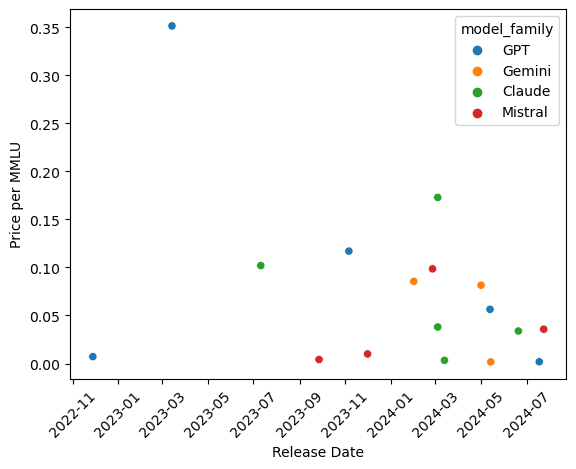

In [69]:
# Plot price per token / time (last year)
import matplotlib.pyplot as plt
import numpy
import datetime
from pydantic import BaseModel

def plot_price_per_token():
    class PriceDevelopments(BaseModel):
        model: str
        price_in: float # the price per million tokens
        price_out: float
        release_date: datetime.date
        mmlu: float


    dataset = [PriceDevelopments(model="GPT-4-turbo", mmlu=85.5, price_in=10, price_out=30, release_date=datetime.date(year=2023, month=11, day=6)),
            PriceDevelopments(model="GPT-4o",mmlu=88.7, price_in=5, price_out=15, release_date=datetime.date(year=2024, month=5, day=13)),
            PriceDevelopments(model="GPT-4o-mini",mmlu=82.0, price_in=0.15, price_out=0.6, release_date=datetime.date(year=2024, month=7, day=18)),
            PriceDevelopments(model="GPT-4",mmlu=85.4, price_in=30, price_out=60, release_date=datetime.date(year=2023, month=3, day=14)),
            PriceDevelopments(model="GPT-3.5-turbo",mmlu=70.0, price_in=0.5, price_out=1.5, release_date=datetime.date(year=2022, month=11, day=28)),
            PriceDevelopments(model="Gemini-1.5-pro",mmlu=85.9, price_in=7, price_out=21, release_date=datetime.date(year=2024, month=5, day=1)),
            PriceDevelopments(model="Gemini-1.5-pro",mmlu=81.9, price_in=7, price_out=21, release_date=datetime.date(year=2024, month=2, day=1)),

            PriceDevelopments(model="Gemini-1.5-flash",mmlu=78.9, price_in=0.13, price_out=0.38, release_date=datetime.date(year=2024, month=5, day=14)),
            PriceDevelopments(model="Claude-2", mmlu=78.5, price_in=8, price_out=24, release_date=datetime.date(year=2023, month=7, day=11)),
            PriceDevelopments(model="Claude-3-opus", mmlu=86.8, price_in=15, price_out=75, release_date=datetime.date(year=2024, month=3, day=4)),
            PriceDevelopments(model="Claude-3-sonnet", mmlu=79, price_in=3, price_out=15, release_date=datetime.date(year=2024, month=3, day=4)),
            PriceDevelopments(model="Claude-3-haiku", mmlu=75.2, price_in=0.25, price_out=1.25, release_date=datetime.date(year=2024, month=3, day=13)),
            PriceDevelopments(model="Claude-3.5-sonnet", mmlu=88.7, price_in=3, price_out=15, release_date=datetime.date(year=2024, month=6, day=20)),
            PriceDevelopments(model="Mistral-8x7b", mmlu=70.6, price_in=0.7, price_out=0.7, release_date=datetime.date(year=2023, month=12, day=1)),
            PriceDevelopments(model="Mistral-large", mmlu=81.2, price_in=8, price_out=8, release_date=datetime.date(year=2024, month=2, day=26)),
            PriceDevelopments(model="Mistral-large2",mmlu=84.0, price_in=3, price_out=9, release_date=datetime.date(year=2024, month=7, day=24)),
            PriceDevelopments(model="Mistral-7b-instruct",mmlu=60.1, price_in=0.25, price_out=0.25, release_date=datetime.date(year=2023, month=9, day=27)),


    ]

    # create a dataframe
    import pandas as pd
    import seaborn.objects as so
    df = pd.DataFrame([m.dict() for m in dataset])
    df["price_per_mmlu"] = df["price_in"]/df["mmlu"]
    df["model_family"] = df["model"].str.split("-").str[0]
    import seaborn as sns

    fig,ax = plt.subplots()
    sns.scatterplot(data=df, x="release_date", y="price_per_mmlu", hue="model_family")
    plt.ylabel("Price per MMLU")
    plt.xlabel("Release Date")

    plt.xticks(rotation=45)
    plt.savefig("/home/aaron/Documents/Projects/MetaGPT/out/plots/price_per_mmlu.svg")
    plt.show()

In [78]:
datetime.date.isoformat()

AttributeError: 'builtin_function_or_method' object has no attribute 'isoformat'

In [75]:
df_sample

,Unnamed: 0,Method,n_paths,n_annotations,Edit_distance,Name,file_name,og_n_paths,og_image_format,cost,time,index,attempts,Edit_distance_no_annot,Edit_distance_only_annot
0,testetst_Image8_edited__Bioformats_0,Bioformats,164,144,0.000000,testetst_Image8_edited__Bioformats_0,testetst_Image8_edited_,164,ome,NaN,0.592632,0,1.000000,0.0,0.000000
1,testetst_Image8_edited__PredictorSimple_<built...,Predictor_Simple,0,0,1.000000,testetst_Image8_edited__PredictorSimple_<built...,testetst_Image8_edited_,164,ome,0.061050,89.303220,0,3.000000,1.0,1.000000
2,testetst_Image8_edited__PredictorNetwork_<buil...,Predictor_Network,130,130,0.724461,testetst_Image8_edited__PredictorNetwork_<buil...,testetst_Image8_edited_,164,ome,0.070065,94.961442,0,1.666667,1.0,0.705380
3,testetst_Image8_edited__PredictorSimpleAnnotat...,Predictor_Simple_Annotation,126,106,0.661744,testetst_Image8_edited__PredictorSimpleAnnotat...,testetst_Image8_edited_,164,ome,0.009850,7.780230,0,1.000000,0.0,0.764187
4,testetst_Image8_edited__PredictorNetworkAnnota...,Predictor_Network_Annotation,150,130,0.619006,testetst_Image8_edited__PredictorNetworkAnnota...,testetst_Image8_edited_,164,ome,0.021585,30.591664,0,1.000000,0.0,0.706385
5,testetst_Image8_edited__PredictorState_<built-...,Predictor_State,0,0,1.000000,testetst_Image8_edited__PredictorState_<built-...,testetst_Image8_edited_,164,ome,0.374055,61.175905,0,3.000000,1.0,1.000000
6,Image_8_Bioformats_0,Bioformats,3232,2259,0.000000,Image_8_Bioformats_0,Image_8,3232,czi,NaN,0.257764,0,1.000000,0.0,0.000000
7,Image_8_PredictorSimple_<built-in function iter>,Predictor_Simple,0,0,1.000000,Image_8_PredictorSimple_<built-in function iter>,Image_8,3232,czi,0.417645,97.261008,0,3.000000,1.0,1.000000
8,Image_8_PredictorNetwork_<built-in function iter>,Predictor_Network,0,0,1.000000,Image_8_PredictorNetwork_<built-in function iter>,Image_8,3232,czi,0.413145,86.847555,0,NaN,1.0,1.000000
9,Image_8_PredictorSimpleAnnotation_<built-in fu...,Predictor_Simple_Annotation,0,0,1.000000,Image_8_PredictorSimpleAnnotation_<built-in fu...,Image_8,3232,czi,0.416100,58.300836,0,3.000000,1.0,1.000000


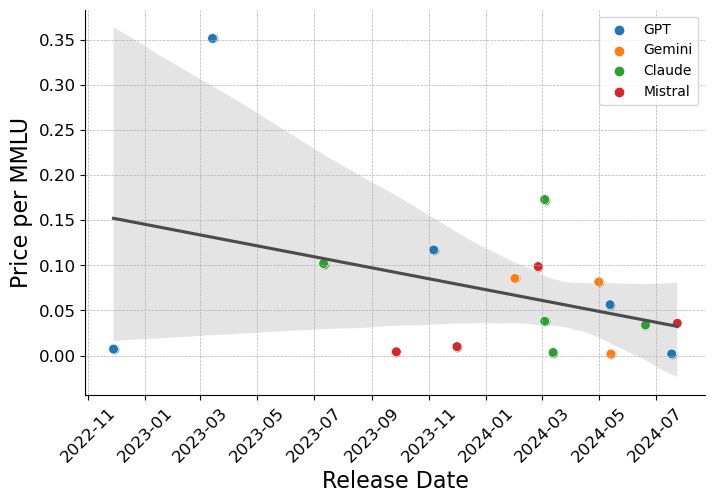

In [1]:
import pandas
from metagpt.evaluators.evaluator_template import EvaluatorTemplate
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
et = EvaluatorTemplate()
df_sample = pd.read_csv("/home/aaron/Documents/Projects/MetaGPT/out/experiment_2024-07-27T11-44-01-418605_0/data_frames/sample_df.csv")
et.plot_price_per_token()

In [1]:
import openai

<Axes: xlabel='x', ylabel='y'>

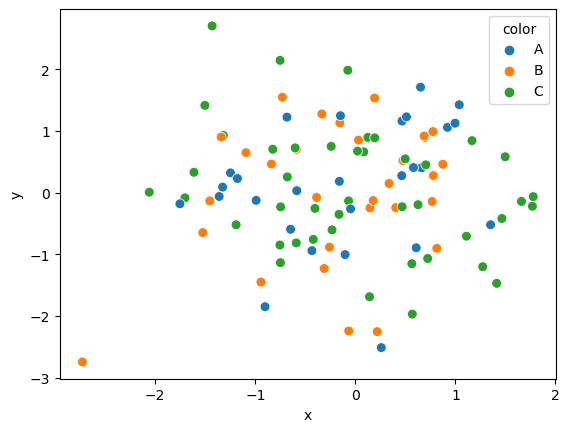

In [12]:
# example seaborn scatterplot

import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import numpy as np

# Create a DataFrame
df = pandas.DataFrame({
    "x": np.random.randn(100),
    "y": np.random.randn(100),
    "z": np.random.randn(100),
    "color": np.random.choice(["A", "B", "C"], 100)
})

# Create a scatterplot
sns.scatterplot(data=df, x="x", y="y", hue="color", s=50)
